In [7]:
from datasets import load_dataset
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
dataset = load_dataset("gsm8k", "main")

test_answers = np.array(dataset["test"]['answer'])

num_steps_all = []

for response in test_answers:
    num_steps_all.append(response.count('\n'))

In [9]:
ckpt = "../ckpts/gsm8k_fft_full_num_steps_NEW/"

test_answers = np.load(ckpt+"test_answers.npy")
test_answer_types = np.load(ckpt+"test_answer_types.npy")
test_answer_correct = test_answer_types==0

In [18]:
num_steps_generated_all = []

for answer_samples in test_answers:
    num_steps_generated = [int(answer[len(" Num steps: ")]) for answer in answer_samples]
    num_steps_generated_all.append(num_steps_generated)

In [20]:
num_steps_generated_all = np.array(num_steps_generated_all)

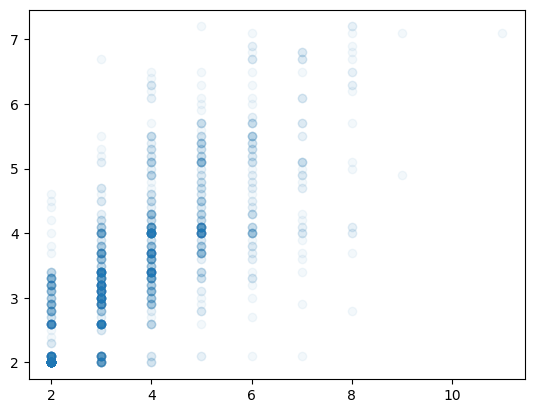

In [21]:
plt.scatter(num_steps_all, num_steps_generated_all.mean(axis=-1), alpha=0.05)

In [16]:
ckpt = "../ckpts/gsm8k_fft_full/"

test_answers = np.load(ckpt+"test_answers.npy")
test_answer_types = np.load(ckpt+"test_answer_types.npy")
test_answer_correct = test_answer_types==0

In [11]:
num_generated_steps_all = []

for example_responses in test_answers:
    num_generated_steps = []
    for response in example_responses:
        num_generated_steps.append(response.count('\n'))
    num_generated_steps_all.append(num_generated_steps)

In [17]:
correct_true_steps = []
correct_predicted_steps = []

incorrect_true_steps = []
incorrect_predicted_steps = []

for i in range(len(test_answer_correct)):
    for j in range(len(test_answer_correct[0])):
        if test_answer_correct[i][j]:
            correct_true_steps.append(num_steps_all[i])
            correct_predicted_steps.append(num_generated_steps_all[i][j])
        else:
            incorrect_true_steps.append(num_steps_all[i])
            incorrect_predicted_steps.append(num_generated_steps_all[i][j])

In [22]:
correct_true_steps = np.array(correct_true_steps)
correct_predicted_steps = np.array(correct_predicted_steps)
incorrect_true_steps = np.array(incorrect_true_steps)
incorrect_predicted_steps = np.array(incorrect_predicted_steps)

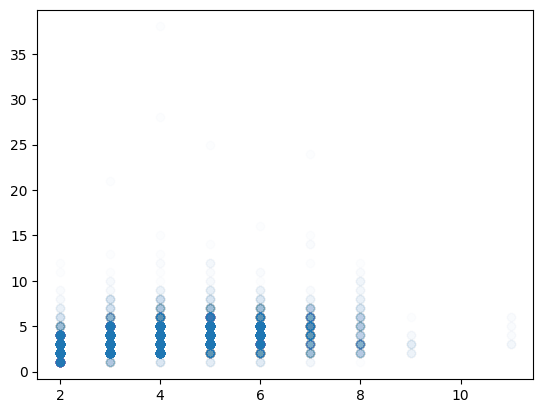

In [41]:
# plt.scatter(correct_true_steps, correct_predicted_steps, alpha=0.05)
plt.scatter(incorrect_true_steps, incorrect_predicted_steps, alpha=0.01)

(array([0.00050607, 0.00067476, 0.00253036, 0.00691633, 0.11538462,
        0.29217274, 0.06730769, 0.01315789, 0.00134953, 0.        ]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <BarContainer object of 10 artists>)

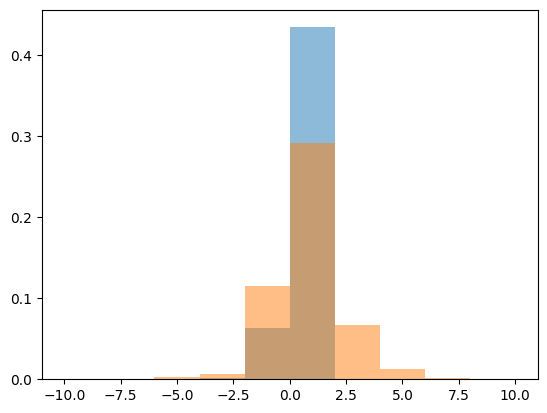

In [40]:
idxs_correct = np.where(correct_true_steps<=3)[0]
idxs_incorrect = np.where(incorrect_true_steps<=3)[0]


plt.hist((correct_true_steps[idxs_correct]-correct_predicted_steps[idxs_correct]), alpha=0.5, density=True, range=(-10, 10))
plt.hist((incorrect_true_steps[idxs_correct]-incorrect_predicted_steps[idxs_correct]), alpha=0.5, density=True, range=(-10, 10))




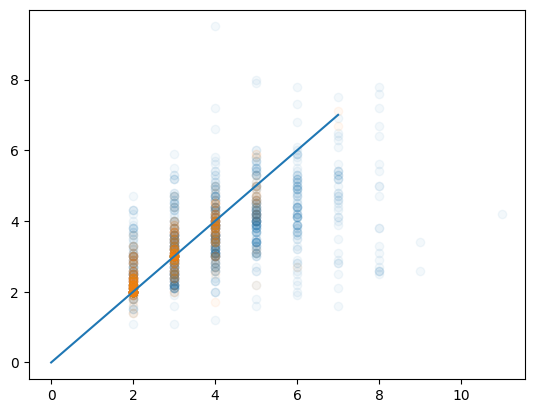

In [47]:
right_idxs = np.where(test_answer_correct.mean(axis=-1)>0.3)
wrong_idxs = np.where(test_answer_correct.mean(axis=-1)<=0.3)

plt.scatter(np.array(num_steps_all)[wrong_idxs], np.array(num_generated_steps_all).mean(axis=-1)[wrong_idxs], alpha=0.05)
plt.scatter(np.array(num_steps_all)[right_idxs], np.array(num_generated_steps_all).mean(axis=-1)[right_idxs], alpha=0.05)

plt.plot([0, 7], [0, 7])

In [7]:
wrong_idxsnum_generated_steps_all

[[3, 4, 3, 4, 4, 4, 3, 5, 4, 4],
 [2, 2, 3, 2, 2, 2, 2, 3, 2, 2],
 [2, 2, 3, 3, 2, 3, 4, 3, 3, 4],
 [1, 1, 2, 2, 1, 2, 1, 2, 2, 2],
 [3, 3, 2, 2, 2, 2, 4, 3, 3, 3],
 [2, 14, 2, 3, 4, 3, 3, 3, 4, 5],
 [3, 3, 3, 3, 3, 4, 4, 3, 3, 3],
 [3, 3, 3, 4, 3, 4, 4, 5, 3, 4],
 [5, 6, 5, 5, 5, 6, 5, 5, 5, 5],
 [3, 3, 2, 3, 4, 4, 4, 4, 5, 5],
 [3, 3, 3, 3, 3, 3, 3, 2, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 3, 4, 4],
 [2, 4, 8, 3, 3, 3, 3, 3, 4, 5],
 [5, 4, 5, 5, 4, 5, 5, 5, 5, 5],
 [5, 6, 6, 3, 6, 5, 5, 7, 5, 6],
 [5, 4, 5, 3, 6, 2, 3, 6, 5, 7],
 [2, 2, 2, 2, 3, 2, 3, 4, 2, 4],
 [4, 4, 4, 4, 5, 4, 4, 5, 4, 5],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3, 2, 4, 4, 3, 3],
 [4, 4, 4, 4, 4, 6, 3, 5, 7, 6],
 [2, 3, 4, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 3, 5, 4, 4, 5, 7, 4],
 [2, 2, 2, 2, 2, 3, 3, 3, 2, 4],
 [3, 2, 2, 2, 2, 2, 3, 3, 3, 3],
 [4, 5, 5, 5, 4, 4, 5, 5, 5, 6],
 [1, 1, 1, 4, 4, 4, 4, 4, 4, 4],
 [3, 3, 3, 3, 3, 4, 3, 3, 4, 4],
 [2, 2, 1, 3, 3, 3, 3, 3, 2, 3],
 [2, 2, 2, 2, 2, 2, 2, 2, 3, 3],
 [3, 3, 3